# Assignment for second attestation
This assignment should be done by the group of 4-5 students. All students must be 
involved in programming. The maximum score for each task is 100. You must submit 
report (pdf) file containing your project and txt file with url to your GitHub repository. The 
defense is obligatory. During defense any team member maybe asked questions related to 
any part of the project and the topics. Student who refused to defend gets 0.
Dataset Description:
- types.csv - reference of transaction types
- codes.csv - reference of transaction codes
- transactions.csv - transactional data on banking operations
- train_set.csv - training set with client gender marking (0/1 - client gender)
- test_set.csv - no need to use.
transactions.csv columns description:
- client_id - client is id
- datetime -transaction date (format - ordered day number hh:mm:ss - 421 06:33:15)
- code - transaction code
- type - transaction type
- sum - sum of transaction
TASKS: WARNING! Here is the written Minimum evaluation criteria.
Assignment for second attestation (Unsupervised, 50%):

I. Explore the dataset. Do the descriptive statistics.

II. Explanatory data analysis. Exploring the features, visualizations etc. (https:// 
www.kaggle.com/learn/data-visualization, https://towardsdatascience.com/ 
exploratory-data-analysis-8fc1cb20fd15, https://www.mastersindatascience.org/ 
learning/what-is-exploratory-data-analysis/ )

III. Feature engineering. Encodings, generating the features from date-time, sum and 
from other columns. (https://www.kaggle.com/learn/feature-engineering, https://
www.kaggle.com/learn/data-cleaning )

IV. Unsupervised learning. Do the Cluster analysis. Segment the customers. K-means, 
Hierarchical Clustering. With different metrics, linkages. Visualize the clusters etc. 
Look for the optimal number of the clusters

V. Analyze models, Result comparison, ROC/AUC, precision and recall
curves, deep analyzing.


VI. Conclusion.

# Part 1 Explore the dataset. Do the descriptive statistics

In [1]:
# Importing all necessary libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import math
import statistics
import scipy.stats
%matplotlib inline

import nltk, warnings
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier 
from sklearn.linear_model import LogisticRegression


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
train = pd.read_csv('train_set.csv', sep=';')
train

,client_id,target
0,75063019,0
1,86227647,1
2,6506523,0
3,50615998,0
4,95213230,0
...,...,...
5995,71577803,0
5996,8128547,1
5997,26055781,0
5998,73504380,1


In [3]:
transaction = pd.read_csv('transactions.csv', sep=';')
transaction

,client_id,datetime,code,type,sum
0,96372458,421 06:33:15,6011,2010,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47
2,21717441,55 13:38:47,6011,2010,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87
...,...,...,...,...,...
130034,15836839,147 11:50:53,5411,1010,-26344.59
130035,28369355,305 11:59:34,4829,2330,-24705.07
130036,40949707,398 21:13:58,5411,1110,-40353.72
130037,7174462,409 13:58:14,5411,1010,-25536.06


In [4]:
types = pd.read_csv('types.csv', sep=';')
types

,type,type_description
0,8001,Установление расх. лимита по карте
1,2411,Перевод с карты на счет др.лица в одном тер. б...
2,4035,н/д(нет данных)
3,3001,Комиссия за обслуживание ссудного счета
4,2420,Перевод с карты на счет физ.лица в другом тер....
...,...,...
150,4110,Плата за получение наличных в АТМ.
151,2320,Безналичный перевод денежных средств через POS
152,7040,Перевод на карту (с карты) через POS (в предел...
153,2433,Перевод с карты на счет физ.лица в другом банк...


In [5]:
codes = pd.read_csv('codes.csv', sep=';')
codes

,code,code_description
0,5944,"Магазины по продаже часов, ювелирных изделий и..."
1,5621,Готовые сумочные изделия
2,5697,"Услуги по переделке, починке и пошиву одежды"
3,7995,Транзакции по азартным играм
4,5137,"Мужская, женская и детская спец-одежда"
...,...,...
179,5044,"Офисное, фотографическое, фотокопировальное, и..."
180,5983,"Горючее топливо — уголь, нефть, разжиженный бе..."
181,5994,Дилеры по продаже печатной продукции
182,5192,"Книги, периодические издания и газеты"


In [6]:
train.describe(include='all')

,client_id,target
count,6.000000e+03,6000.000000
mean,5.102984e+07,0.443333
std,2.881391e+07,0.496820
min,2.289900e+04,0.000000
25%,2.612906e+07,0.000000
50%,5.164080e+07,0.000000
75%,7.590927e+07,1.000000
max,9.999124e+07,1.000000


In [7]:
transaction.describe(include='all')

,client_id,datetime,code,type,sum
count,1.300390e+05,130039,130039.000000,130039.000000,1.300390e+05
unique,NaN,114770,NaN,NaN,NaN
top,NaN,456 00:00:00,NaN,NaN,NaN
freq,NaN,60,NaN,NaN,NaN
mean,5.086859e+07,NaN,5594.629996,2489.372135,-1.812909e+04
std,2.872854e+07,NaN,606.087084,2253.296578,5.584445e+05
min,2.289900e+04,NaN,742.000000,1000.000000,-4.150030e+07
25%,2.577174e+07,NaN,5211.000000,1030.000000,-2.244916e+04
50%,5.235837e+07,NaN,5641.000000,1110.000000,-5.502490e+03
75%,7.506302e+07,NaN,6010.000000,2370.000000,-1.122960e+03


In [8]:
types.describe(include='all')

,type,type_description
count,155.000000,155
unique,NaN,139
top,NaN,н/д
freq,NaN,13
mean,10819.045161,NaN
std,80000.258847,NaN
min,1000.000000,NaN
25%,2385.500000,NaN
50%,4040.000000,NaN
75%,7027.500000,NaN


In [9]:
codes.describe(include='all')

,code,code_description
count,184.000000,184
unique,NaN,184
top,NaN,"Магазины по продаже часов, ювелирных изделий и..."
freq,NaN,1
mean,6046.793478,NaN
std,1470.328104,NaN
min,742.000000,NaN
25%,5208.250000,NaN
50%,5813.500000,NaN
75%,7283.000000,NaN


# Part 2 Explanatory data analysis. Exploring the features, visualizations etc

In [10]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   client_id  6000 non-null   int64
 1   target     6000 non-null   int64
dtypes: int64(2)
memory usage: 93.9 KB
None


In [11]:
print(transaction.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130039 entries, 0 to 130038
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   client_id  130039 non-null  int64  
 1   datetime   130039 non-null  object 
 2   code       130039 non-null  int64  
 3   type       130039 non-null  int64  
 4   sum        130039 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 5.0+ MB
None


In [12]:
print(types.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   type              155 non-null    int64 
 1   type_description  155 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB
None


In [13]:
print(codes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   code              184 non-null    int64 
 1   code_description  184 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.0+ KB
None


In [14]:
train.isnull().sum()

client_id    0
target       0
dtype: int64

In [15]:
transaction.isnull().sum()

client_id    0
datetime     0
code         0
type         0
sum          0
dtype: int64

In [16]:
types.isnull().sum()

type                0
type_description    0
dtype: int64

In [17]:
codes.isnull().sum()

code                0
code_description    0
dtype: int64

In [18]:
train.duplicated().sum()

0

Duplicates in dataframe

In [19]:
duplicate = transaction.duplicated()
transaction[duplicate]

,client_id,datetime,code,type,sum
19523,63109769,242 00:00:00,5735,1200,-6715.29
45246,48214869,9 00:00:00,7399,8100,7389.06
46196,27868636,16 00:00:00,5814,1110,-35148.58
51995,53748811,114 00:00:00,7311,1100,-314.43
55931,29129514,275 00:00:00,7994,1200,-3368.87
59170,77773677,452 00:00:00,7995,1200,-11229.58
60367,58798619,353 00:00:00,6011,2110,-2245.92
63314,61799579,234 00:00:00,4814,1100,-2245.92
64229,38714155,167 00:00:00,7995,1200,-5614.79
64245,46523355,69 00:00:00,4112,1110,-74411.68


In [20]:
transaction.drop_duplicates(inplace=True)
transaction.duplicated().sum()

0

In [21]:
types.duplicated().sum()

0

In [22]:
codes.duplicated().sum()

0

Check for outlier in our sum column

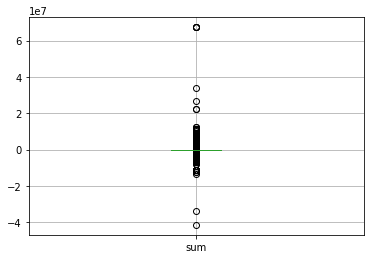

In [23]:
transaction.boxplot(column=['sum'])
plt.show()

Check for balance of our target value

Text(0.5, 1.0, 'Count of target variables')

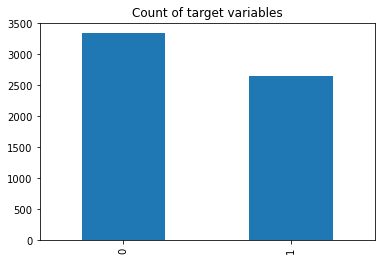

In [24]:
train.target.value_counts().plot(kind = 'bar')
plt.title("Count of target variables")

Distribution of out client's sum

Text(0.5, 1.0, 'Transaction sum of clients')

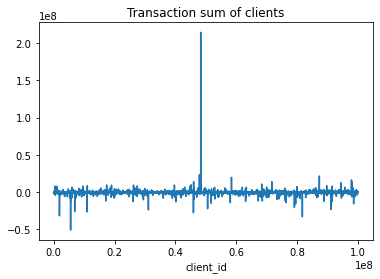

In [25]:
transaction.groupby("client_id")['sum'].agg(sum).plot()
plt.title("Transaction sum of clients")

Merge dataframe into one

In [26]:
df_merged = pd.merge(train, transaction, on='client_id', how='left')
df_merged = pd.merge(df_merged,types , how='left', on='type')
df_merged = pd.merge(df_merged,codes,how='left', on='code' )
df_merged

,client_id,target,datetime,code,type,sum,type_description,code_description
0,75063019,0,397 20:05:07,4814,1030,-4491.83,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих..."
1,75063019,0,86 20:29:50,6010,7070,4491.83,Перевод на карту (с карты) через Мобильный бан...,Финансовые институты — снятие наличности вручную
2,75063019,0,375 16:00:33,4814,1030,-3144.28,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих..."
3,75063019,0,136 17:10:60,5411,1010,-3930.35,Покупка. POS,"Бакалейные магазины, супермаркеты"
4,75063019,0,378 13:01:51,6011,2010,-4491.83,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
...,...,...,...,...,...,...,...,...
91802,1846496,0,452 00:00:00,5999,1100,-2243.45,Покупка.,Плавательные бассейны — распродажа
91803,1846496,0,196 13:59:07,5411,1010,-4783.80,Покупка. POS,"Бакалейные магазины, супермаркеты"
91804,1846496,0,186 13:38:15,5732,1010,-112273.33,Покупка. POS,Продажа электронного оборудования
91805,1846496,0,440 16:02:57,6010,7030,168443.68,Перевод на карту (с карты) через АТМ (в предел...,Финансовые институты — снятие наличности вручную


Get info about our merged dataframe

In [27]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91807 entries, 0 to 91806
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         91807 non-null  int64  
 1   target            91807 non-null  int64  
 2   datetime          91807 non-null  object 
 3   code              91807 non-null  int64  
 4   type              91807 non-null  int64  
 5   sum               91807 non-null  float64
 6   type_description  91781 non-null  object 
 7   code_description  91807 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 6.3+ MB


All description types

In [28]:
df_merged.groupby("type_description").size()

type_description
Безналичный перевод денежных средств через POS                                                              68
Взнос наличных через POS                                                                                   328
Взнос наличных через POS (в своем ТБ) по счету в овердрафте                                                  2
Взнос наличных через АТМ                                                                                   176
Взнос наличных через АТМ (в других ТБ) по счету в овердрафте                                                 3
Взнос наличных через АТМ (в своем ТБ) по счету в овердрафте                                                 24
Взнос наличных через АТМ (в своем тер.банке)                                                              3529
Возврат  покупки.                                                                                           26
Возврат  покупки. POS                                                                          

In [29]:
df_merged.code.nunique()

173

# Part 3. Feature engineering. Encodings, generating the features from date-time, sum and from other columns.


**Mutual information** describes relationships in terms of uncertainty. The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other. In probability theory and information theory, the mutual information (MI) of two random variables is a measure of the mutual dependence between the two variables. More specifically, it quantifies the "amount of information"  obtained about one random variable by observing the other random variable.

In [30]:
df_merged.shape

(91807, 8)

In [31]:
df_merged.drop(df_merged[df_merged.type_description == 'н/д'].index, inplace=True) # drop nan rows from type_description column
df_merged.shape

(91732, 8)

In [32]:
for col in df_merged.columns:  # for every column 
    if len(df_merged[col].unique()) == 1:   # check unique rows
        df_merged.drop(col,inplace=True,axis=1) # drop other columns

In [33]:
df_merged.shape

(91732, 8)

In [34]:
X = df_merged.copy()
y = X.pop("code") 

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes
discrete_features = X.dtypes == int

In [35]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features): # mutual information scores
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features) # regression
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

code_description    2.653607
sum                 0.980312
target              0.011863
Name: MI Scores, dtype: float64

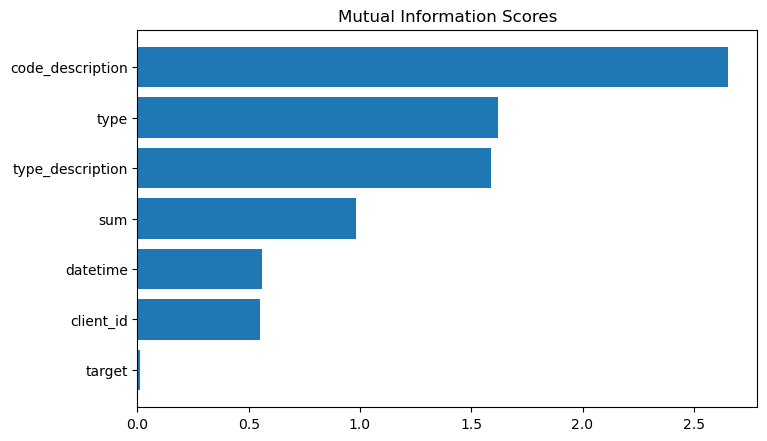

In [36]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True) # scores sorting
    width = np.arange(len(scores))  # length of the scores
    ticks = list(scores.index)  # indexes of scores
    plt.barh(width, scores)   # width of graph
    plt.yticks(width, ticks) # ticks of graph
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [37]:
missing_values_count = df_merged.isnull().sum()

# check the amount of missing points in the first ten columns
missing_values_count[0:10]

client_id            0
target               0
datetime             0
code                 0
type                 0
sum                  0
type_description    26
code_description     0
dtype: int64

In [38]:
# fill NaN values in the target column
# first we sort the column, then we fill in the nulls with the values of the previous row
df_merged.target = df_merged.sort_values(by='client_id').target.fillna(method='ffill')

In [39]:
df_merged

,client_id,target,datetime,code,type,sum,type_description,code_description
0,75063019,0,397 20:05:07,4814,1030,-4491.83,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих..."
1,75063019,0,86 20:29:50,6010,7070,4491.83,Перевод на карту (с карты) через Мобильный бан...,Финансовые институты — снятие наличности вручную
2,75063019,0,375 16:00:33,4814,1030,-3144.28,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих..."
3,75063019,0,136 17:10:60,5411,1010,-3930.35,Покупка. POS,"Бакалейные магазины, супермаркеты"
4,75063019,0,378 13:01:51,6011,2010,-4491.83,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
...,...,...,...,...,...,...,...,...
91802,1846496,0,452 00:00:00,5999,1100,-2243.45,Покупка.,Плавательные бассейны — распродажа
91803,1846496,0,196 13:59:07,5411,1010,-4783.80,Покупка. POS,"Бакалейные магазины, супермаркеты"
91804,1846496,0,186 13:38:15,5732,1010,-112273.33,Покупка. POS,Продажа электронного оборудования
91805,1846496,0,440 16:02:57,6010,7030,168443.68,Перевод на карту (с карты) через АТМ (в предел...,Финансовые институты — снятие наличности вручную


Parsing dates

In [40]:
days_hour = [i for i in df_merged.datetime.str.split(' ')]  # list of days
days = [days_hour[i][0] for i in range(len(days_hour))]  # for every column in range of days_hour length
days = [int(i) for i in days]  
len(days)

91732

In [41]:
year_w_d = pd.date_range(end = "2021-01-01", periods = max(days)+1).tolist() # create list with different days
year = []   # create list
for i in range(len(days)): 
    for j in range(457):
        if days[i] == j:
            year.append(year_w_d[j]) # appending date to 'year' list
df_merged['Time'] = year  # new column with date
df_merged

,client_id,target,datetime,code,type,sum,type_description,code_description,Time
0,75063019,0,397 20:05:07,4814,1030,-4491.83,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих...",2020-11-03
1,75063019,0,86 20:29:50,6010,7070,4491.83,Перевод на карту (с карты) через Мобильный бан...,Финансовые институты — снятие наличности вручную,2019-12-28
2,75063019,0,375 16:00:33,4814,1030,-3144.28,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих...",2020-10-12
3,75063019,0,136 17:10:60,5411,1010,-3930.35,Покупка. POS,"Бакалейные магазины, супермаркеты",2020-02-16
4,75063019,0,378 13:01:51,6011,2010,-4491.83,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,2020-10-15
...,...,...,...,...,...,...,...,...,...
91802,1846496,0,452 00:00:00,5999,1100,-2243.45,Покупка.,Плавательные бассейны — распродажа,2020-12-28
91803,1846496,0,196 13:59:07,5411,1010,-4783.80,Покупка. POS,"Бакалейные магазины, супермаркеты",2020-04-16
91804,1846496,0,186 13:38:15,5732,1010,-112273.33,Покупка. POS,Продажа электронного оборудования,2020-04-06
91805,1846496,0,440 16:02:57,6010,7030,168443.68,Перевод на карту (с карты) через АТМ (в предел...,Финансовые институты — снятие наличности вручную,2020-12-16


In [42]:
df_merged['income'] = df_merged['sum'].where(df_merged['sum'] > 0) 
df_merged['spending'] = df_merged['sum'].where(df_merged['sum'] <= 0)
df_merged = df_merged.replace(np.nan, 0)
income = df_merged[df_merged.income > 0].income
spending = df_merged[df_merged.spending < 0].spending

In [43]:
print('Average income of clients: ', round(np.mean(income), 2))
print('Average spendings of clients: ', round(np.mean(spending), 2))
print('Income mode: ', income.mode())
print('Spending mode: ', spending.mode())
print('Median of income: ', round(np.median(income), 2))
print('Median of spending: ', round(np.median(spending), 2))
print("Variance of income set is % s"
      %(statistics.variance(income)))
print("Variance of spending set is % s"
      %(statistics.variance(spending)))
print('Standard deviation of income of clients: ', round(np.std(income), 2))
print('Standard deviation of spendings of clients: ', round(np.std(spending), 2))


Average income of clients:  164463.58
Average spendings of clients:  -61137.22
Income mode:  0    22459.16
dtype: float64
Spending mode:  0   -2245.92
dtype: float64
Median of income:  22459.16
Median of spending:  -8983.66
Variance of income set is 1442827663402.668
Variance of spending set is 119884897669.1505
Standard deviation of income of clients:  1201144.41
Standard deviation of spendings of clients:  346241.63


# Outliers defining

In [44]:
Q1 = income.quantile(0.25)
Q3 = income.quantile(0.75)
IQR = Q3 - Q1

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

outlier =[]
for x in income:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print('There are', len(outlier), 'outlier incomes.')
Q1 = spending.quantile(0.25)
Q3 = spending.quantile(0.75)
IQR = Q3 - Q1
print('upper limit of income:' , up_lim)
print('lower limit of income:' , low_lim)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

outlier =[]
for x in spending:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print('upper limit of spending:' , up_lim)
print('lower limit of spending:' , low_lim)
print('There are', len(outlier), 'outlier spendings.')

There are 2450 outlier incomes.
upper limit of income: 213642.73
lower limit of income: -116506.87000000001
upper limit of spending: 33424.454999999994
lower limit of spending: -63666.94499999999
There are 11419 outlier spendings.


# RFM analysis

The “RFM” in RFM analysis stands for recency, frequency and monetary value. RFM analysis is a way to use data based on existing customer behavior to predict how a new customer is likely to act in the future. An RFM model is built using three key factors:

1) how recently a customer has transacted with a brand

2) how frequently they’ve engaged with a brand

3) how much money they’ve spent on a brand’s products and services

In [45]:
df_recency = df_merged.groupby(by='client_id', # grouping by client_id
                        as_index=False)['Time'].max()  # take max date
df_recency.columns = ['Client_id', 'LastOperationDate'] # columns of recency datafrance
recent_date = df_recency['LastOperationDate'].max()  
df_recency['Recency'] = df_recency['LastOperationDate'].apply(  # calculate recency
    lambda x: (recent_date - x).days)
df_recency.head()

,Client_id,LastOperationDate,Recency
0,22899,2020-12-17,15
1,27914,2020-07-21,164
2,28753,2020-12-09,23
3,38084,2020-12-05,27
4,49793,2020-12-15,17


In [46]:
frequency_df = df_merged.drop_duplicates().groupby( # new frequency dataframe that grouped by client_id 
    by=['client_id'], as_index=False)['Time'].count() # and count of days that client made operations
frequency_df.columns = ['Client_id', 'Frequency'] # columns of frequency dataframe
frequency_df.head()

,Client_id,Frequency
0,22899,9
1,27914,4
2,28753,13
3,38084,26
4,49793,21


In [47]:
# Here we are calculating the monetary value of customer spend on using bank operations.
monetary_df = df_merged.groupby(by='client_id', as_index=False)['sum'].sum()
monetary_df.columns = ['Client_id', 'Monetary']
monetary_df.head()

,Client_id,Monetary
0,22899,50847.54
1,27914,74115.21
2,28753,-2589800.29
3,38084,693495.66
4,49793,-1382413.97


In [48]:
rf_df = df_recency.merge(frequency_df, on='Client_id')  # merge recency, frequency and monetary datasets into one
rfm_df = rf_df.merge(monetary_df, on='Client_id').drop(columns='LastOperationDate') # drop LastOperationDate column
rfm_df.head()

,Client_id,Recency,Frequency,Monetary
0,22899,15,9,50847.54
1,27914,164,4,74115.21
2,28753,23,13,-2589800.29
3,38084,27,26,693495.66
4,49793,17,21,-1382413.97


In [49]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)  # give rank to every column
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100  # normalizing and adding a columns
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True) # drop unnecessary columns
 
rfm_df.head()

,Client_id,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,22899,15,9,50847.54,64.814030,42.991667,42.991667
1,27914,164,4,74115.21,8.480895,18.625000,18.625000
2,28753,23,13,-2589800.29,53.494874,58.675000,58.675000
3,38084,27,26,693495.66,49.072270,86.850000,86.850000
4,49793,17,21,-1382413.97,61.526730,79.450000,79.450000


In [50]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 *rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['Client_id', 'RFM_Score']].head(7)

,Client_id,RFM_Score
0,22899,2.31
1,27914,0.86
2,28753,2.89
3,38084,4.06
4,49793,3.84
5,50940,1.02
6,52926,3.40


In [51]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >  # giving a status for every client
                                      3, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 2,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 1,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 0.5,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['Client_id', 'RFM_Score', 'Customer_segment']].head(20)

,Client_id,RFM_Score,Customer_segment
0,22899,2.31,High value Customer
1,27914,0.86,Low Value Customers
2,28753,2.89,High value Customer
3,38084,4.06,Top Customers
4,49793,3.84,Top Customers
5,50940,1.02,Medium Value Customer
6,52926,3.40,Top Customers
7,53395,0.68,Low Value Customers
8,70680,2.40,High value Customer
9,81626,1.34,Medium Value Customer


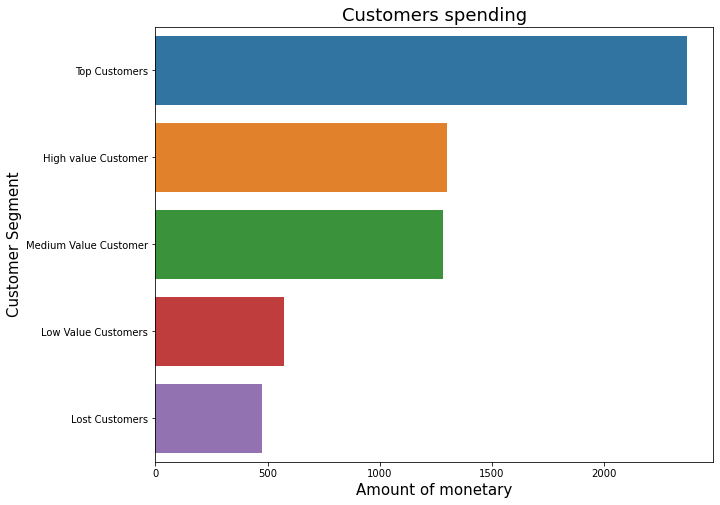

In [52]:
import seaborn as sns
df2 = rfm_df.groupby('Customer_segment').Monetary.count().sort_values(ascending = False).reset_index().head(10)
#Visualisation with horizontal bar plot using seaborn
fig, ax = plt.subplots(figsize = (10, 8))
sns.barplot(x = "Monetary", y = "Customer_segment", linewidth=1, data=df2)
plt.xlabel('Amount of monetary', size = 15)
plt.ylabel('Customer Segment', size = 15)
plt.title('Customers spending',  size = 18)
plt.show()

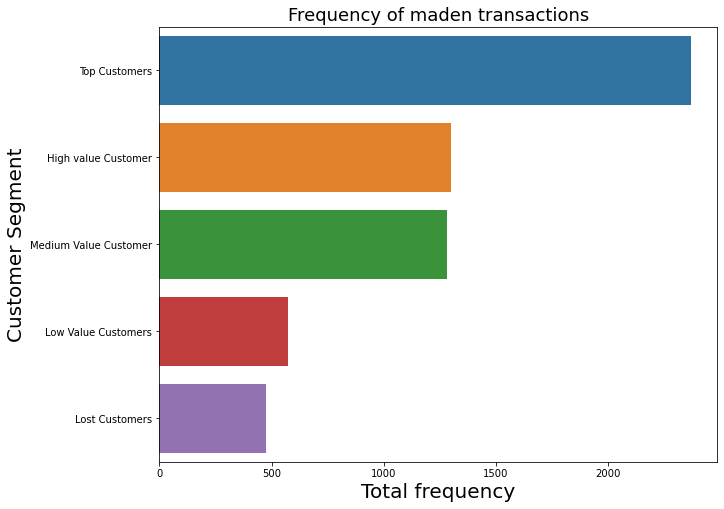

In [53]:
df3 = rfm_df.groupby('Customer_segment').Monetary.count().sort_values(ascending = False).reset_index().head(10)
#Visualisation with horizontal bar plot using seaborn
fig, ax = plt.subplots(figsize = (10, 8))
sns.barplot(x = "Monetary", y = "Customer_segment", linewidth=1, data=df3)
plt.xlabel('Total frequency', size = 20)
plt.ylabel('Customer Segment', size = 20)
plt.title('Frequency of maden transactions',  size = 18)
plt.show()

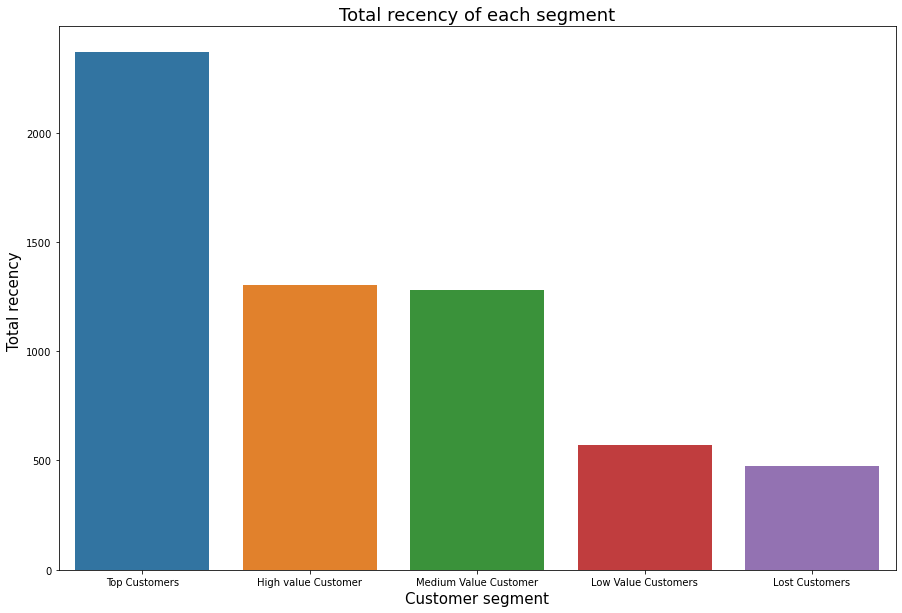

In [54]:
df4 = rfm_df.groupby('Customer_segment').Recency.count().sort_values(ascending = False).reset_index()
fig, ax = plt.subplots(figsize = (15, 10))
sns.barplot(x = "Customer_segment", y = "Recency", linewidth=1, data=df4)
plt.xlabel('Customer segment', size = 15)
plt.ylabel('Total recency ', size = 15)
plt.title('Total recency of each segment',  size = 18)
plt.show()

# Part 4. Supervised learning. Build model for prediction the gender of the clients.Decision Trees, KNN, Random Forest. Tune the hyper parameters, grid search, cross validation etc. Visualization of the models etc


### Preparing datasets

In [55]:
df_merged

,client_id,target,datetime,code,type,sum,type_description,code_description,Time,income,spending
0,75063019,0,397 20:05:07,4814,1030,-4491.83,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих...",2020-11-03,0.00,-4491.83
1,75063019,0,86 20:29:50,6010,7070,4491.83,Перевод на карту (с карты) через Мобильный бан...,Финансовые институты — снятие наличности вручную,2019-12-28,4491.83,0.00
2,75063019,0,375 16:00:33,4814,1030,-3144.28,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих...",2020-10-12,0.00,-3144.28
3,75063019,0,136 17:10:60,5411,1010,-3930.35,Покупка. POS,"Бакалейные магазины, супермаркеты",2020-02-16,0.00,-3930.35
4,75063019,0,378 13:01:51,6011,2010,-4491.83,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,2020-10-15,0.00,-4491.83
...,...,...,...,...,...,...,...,...,...,...,...
91802,1846496,0,452 00:00:00,5999,1100,-2243.45,Покупка.,Плавательные бассейны — распродажа,2020-12-28,0.00,-2243.45
91803,1846496,0,196 13:59:07,5411,1010,-4783.80,Покупка. POS,"Бакалейные магазины, супермаркеты",2020-04-16,0.00,-4783.80
91804,1846496,0,186 13:38:15,5732,1010,-112273.33,Покупка. POS,Продажа электронного оборудования,2020-04-06,0.00,-112273.33
91805,1846496,0,440 16:02:57,6010,7030,168443.68,Перевод на карту (с карты) через АТМ (в предел...,Финансовые институты — снятие наличности вручную,2020-12-16,168443.68,0.00


In [56]:
train_df  = df_merged.drop(['datetime', 'type_description', 'code_description', 'Time'], axis = 1)
train_df = train_df.rename(columns={'target': 'gender'})
train_df

,client_id,gender,code,type,sum,income,spending
0,75063019,0,4814,1030,-4491.83,0.00,-4491.83
1,75063019,0,6010,7070,4491.83,4491.83,0.00
2,75063019,0,4814,1030,-3144.28,0.00,-3144.28
3,75063019,0,5411,1010,-3930.35,0.00,-3930.35
4,75063019,0,6011,2010,-4491.83,0.00,-4491.83
...,...,...,...,...,...,...,...
91802,1846496,0,5999,1100,-2243.45,0.00,-2243.45
91803,1846496,0,5411,1010,-4783.80,0.00,-4783.80
91804,1846496,0,5732,1010,-112273.33,0.00,-112273.33
91805,1846496,0,6010,7030,168443.68,168443.68,0.00


In [57]:
X = train_df.drop("gender", axis=1)
y = train_df["gender"]
X

,client_id,code,type,sum,income,spending
0,75063019,4814,1030,-4491.83,0.00,-4491.83
1,75063019,6010,7070,4491.83,4491.83,0.00
2,75063019,4814,1030,-3144.28,0.00,-3144.28
3,75063019,5411,1010,-3930.35,0.00,-3930.35
4,75063019,6011,2010,-4491.83,0.00,-4491.83
...,...,...,...,...,...,...
91802,1846496,5999,1100,-2243.45,0.00,-2243.45
91803,1846496,5411,1010,-4783.80,0.00,-4783.80
91804,1846496,5732,1010,-112273.33,0.00,-112273.33
91805,1846496,6010,7030,168443.68,168443.68,0.00


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)  

In [59]:
X_test

,client_id,code,type,sum,income,spending
12633,46095038,6011,7010,561478.94,561478.94,0.00
58221,21276897,5641,1110,-105558.04,0.00,-105558.04
48079,49760703,6011,7010,4491.83,4491.83,0.00
7666,87252636,6011,2010,-1257712.83,0.00,-1257712.83
8593,32508028,5411,1110,-1010.66,0.00,-1010.66
...,...,...,...,...,...,...
49604,48463492,5411,1110,-2910.71,0.00,-2910.71
42497,53854864,4829,2370,-2099.48,0.00,-2099.48
3948,63557480,6011,2010,-4491.83,0.00,-4491.83
65227,38691781,6010,7070,15079.53,15079.53,0.00


In [60]:
y_test

12633    1
58221    1
48079    1
7666     1
8593     1
        ..
49604    0
42497    0
3948     0
65227    0
71164    0
Name: gender, Length: 30272, dtype: int64

In [61]:
#X_train = train_df.drop("target", axis=1)
#Y_train = train_df["target"]

In [62]:
#X_test  = train_df.drop("client_id", axis=1).copy()

### K-Nearest Neighboors

In [63]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X, y)  
y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X, y) * 100, 2)

In [64]:
acc_knn

94.39

In [65]:
result = pd.DataFrame(data = y_test)
result["predicted_gender"] = knn.predict(X_test)
result

,gender,predicted_gender
12633,1,0
58221,1,1
48079,1,1
7666,1,1
8593,1,1
...,...,...
49604,0,0
42497,0,0
3948,0,0
65227,0,0


### Random Forest

In [66]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, y)

RandomForestClassifier()

Y_prediction = random_forest.predict(X_test)
Y_prediction

In [67]:
random_forest.score(X, y)
acc_random_forest = round(random_forest.score(X, y) * 100, 2)
acc_random_forest

99.99

In [68]:
result = pd.DataFrame(data = y_test)
result["predicted_class"] = random_forest.predict(X_test)
result

,gender,predicted_class
12633,1,1
58221,1,1
48079,1,1
7666,1,1
8593,1,1
...,...,...
49604,0,0
42497,0,0
3948,0,0
65227,0,0


### Desicion Tree

In [69]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X, y)  


DecisionTreeClassifier()

In [70]:
y_pred = decision_tree.predict(X_test)  
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [71]:
acc_decision_tree = round(decision_tree.score(X, y) * 100, 2)
acc_decision_tree

100.0

In [72]:
result = pd.DataFrame(data = y_test)
result["predicted_gender"] = decision_tree.predict(X_test)
result

,gender,predicted_gender
12633,1,1
58221,1,1
48079,1,1
7666,1,1
8593,1,1
...,...,...
49604,0,0
42497,0,0
3948,0,0
65227,0,0


from sklearn.tree import plot_tree 
%matplotlib inline

plot_tree(decision_tree, feature_names = X.columns)

### Logistic Regression


In [73]:
logreg = LogisticRegression()
logreg.fit(X, y)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X, y) * 100, 2)

### Stochastic Gradient Descent (SGD)


In [74]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X, y)
Y_pred = sgd.predict(X_test)

sgd.score(X, y)

acc_sgd = round(sgd.score(X, y) * 100, 2)

### Defining best model

In [75]:
results = pd.DataFrame({
    'Model': ['Decision Tree', 'KNN',
              'Random Forest', 'Logistic Regression', 'SGD'],
    'Score': [acc_decision_tree, acc_knn,
              acc_random_forest, acc_log, acc_sgd]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Decision Tree
99.99,Random Forest
94.39,KNN
52.00,Logistic Regression
49.12,SGD


### K Fold cross validation

In [76]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)


In [77]:
scores = cross_val_score(rf, X, y, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.48408546 0.50632221 0.5258912  0.51738799 0.51215524 0.64112068
 0.54769432 0.51575275 0.53265017 0.538428  ]
Mean: 0.5321488018350173
Standard Deviation: 0.04007358584979801


### Random Forest retraining

In [78]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
client_id,0.593
sum,0.154
spending,0.131
code,0.059
type,0.038
income,0.025


In [97]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


### Hyper Parameter Tuning 

In [82]:
param_grid = { "criterion" : ["gini", "entropy"], 
              "min_samples_leaf" : [1, 5, 10, 25, 50, 70], 
              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], 
              "n_estimators": [100, 400, 700, 1000, 1500]}


In [101]:
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=10, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, 
                   param_grid=param_grid, 
                   n_jobs=-1)


clf.fit(X, y)


rf_best=clf.bestparams
rf_best

from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))

plot_tree(rf_best.estimators_[5], 
          feature_names = cancer.feature_names, 
          class_names=cancer.target_names
          ,filled=True);

random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X, y)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X, y)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

# Part 5 Analyze models, Result comparison, ROC/AUC, precision and recall curves, deep analyzing.


### Confusion Matrix

In [85]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X, y, cv=3)
confusion_matrix(y, predictions)


array([[26583, 20091],
       [24762, 20296]], dtype=int64)

#### Precision and Recall

In [86]:
### Precision and Recall
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y, predictions))
print("Recall:",recall_score(y, predictions))

Precision: 0.5025379453784634
Recall: 0.4504416529806028


#### F-score

In [87]:
from sklearn.metrics import f1_score
f1_score(y, predictions)

0.4750658318216397

### Precision Recall Curves

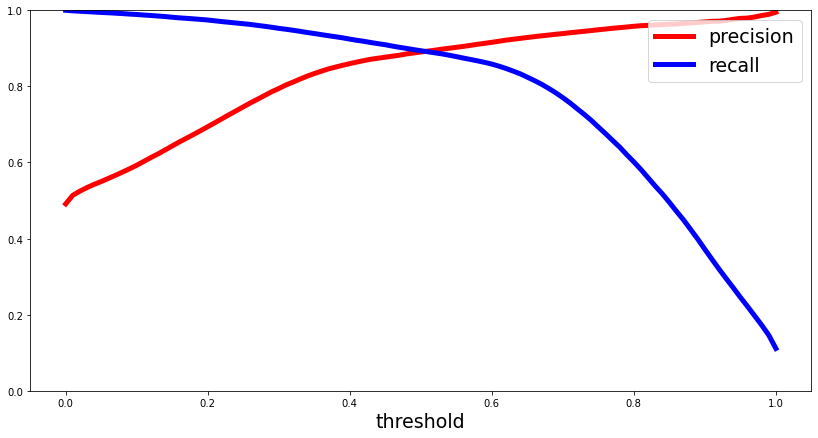

In [88]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

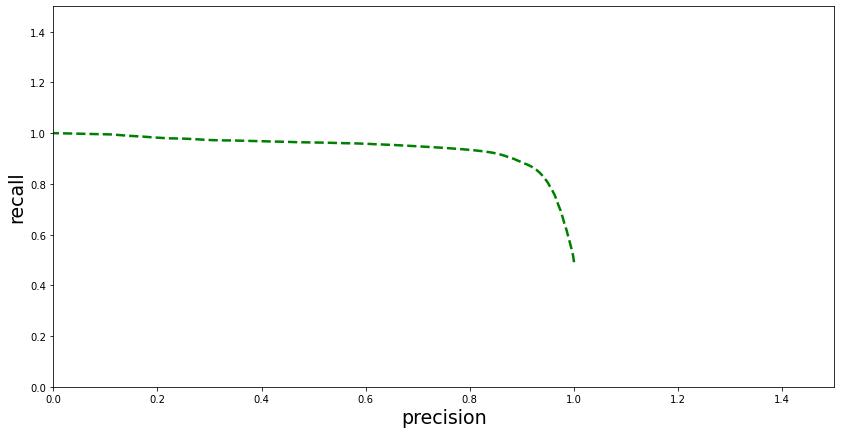

In [89]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

### ROC AUC Score


AUC-ROC is the valued metric used for evaluating the performance in classification models. The AUC-ROC metric clearly helps determine and tell us about the capability of a model in distinguishing the classes. The judging criteria being - Higher the AUC, better the model.

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

### ROC AUC Curve


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [94]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [95]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.5105761973829777 0.9312914606528386


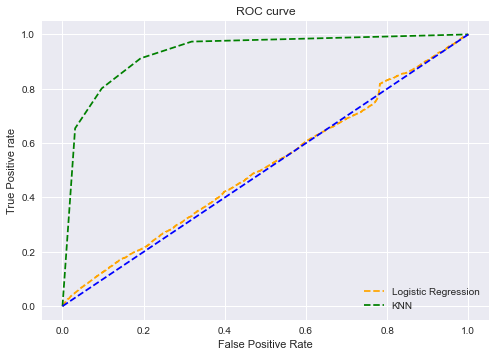

In [96]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

We analyzed 4 datasets that were combined into one merged dataset
We checked each dataset for duplicates and Nulls and removed them if there were any.
We determined the outliers of sum value , checked for balance of target value, determined the distribution of out client's sum and plotted them.
Next, we added feature engineering, defined Mutual information , their scores , then we make date parsing with our merged dataframe . Using RFM principle we get 4 separated types of clients 'Top Value', 'High value', 'Medium Value' and 'Low value' clients. 

# Part 6 Conclusion

We have used different methods to explore and get informaiton about transactions in bank account. With Python functionality and other modules we analyzed 4 datasets that were combined into one merged dataset. We have also visualized the transactions.
Data science is about knowing the right tools to use for a job, and often we need to go beyond accuracy when developing classification models. Knowing about recall, precision, F1, and the ROC curve allows us to assess classification models and should make us think skeptically about anyone touting only the accuracy of a model, especially for imbalanced problems.